In [218]:
#from D4PG_plots_utils import *
import pickle
import matplotlib.pyplot as plt
import numpy as np
import D4PG
import torch
import gymnasium as gym

blue = '#264653'
green = '#2A9D8F'
olive= '#8AB17D'
yellow= '#E9C46A'
orange = '#F4A261'
red= '#E76F51'

colors = [blue, green, olive, yellow, orange, red]

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def run(env, agent, n_episodes=100, noise=0):
    rewards = []
    observations = []
    actions = []
    for ep in range(1, n_episodes+1):
        ep_reward = 0
        state, _info = env.reset()
        for t in range(2000):
            action = agent.act(state, noise)
            state, reward, done, _trunc, _info = env.step(action)
            observations.append(state)
            actions.append(action)
            ep_reward += reward
            if done or _trunc:
                break
        rewards.append(ep_reward)
        ep_reward = 0
    print(f'Mean reward: {np.mean(rewards)}')
    observations = np.asarray(observations)
    actions = np.asarray(actions)
    return observations, actions, rewards


def create_subplot(left_plot_data, right_plot_data, left_plot_label, right_plot_label, left_plot_title,
                   right_plot_title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    if (isinstance(left_plot_data, list)):
        for data, label in zip(left_plot_data, left_plot_label):
            axs[0].plot(data, label=label)
    else:
        axs[0].plot(left_plot_data, label=left_plot_label)

    axs[0].legend()
    axs[0].set_title(left_plot_title)

    if (isinstance(right_plot_data, list)):
        for data, label in zip(right_plot_data, right_plot_label):
            axs[1].plot(data, label=label)
    else:
        axs[1].plot(right_plot_data, label=right_plot_label)

    axs[1].legend()
    axs[1].set_title(right_plot_title)

    plt.tight_layout()
    plt.show()


def load_rewards_and_losses(env_name, eps, ts, lr, s, tau):
    with open(f"./results/D4PG_{env_name}-eps{eps}-t{ts}-l{lr}-s{s}-tau{tau}-stat.pkl", 'rb') as f:
        data = pickle.load(f)

        rewards = np.asarray(data["rewards"])
        losses = np.asarray(data["losses"])

        return rewards, losses


def load_checkpoint(env_name, episodes, eps, ts, lr, seed, tau):
    env = gym.make(env_name, render_mode="human")

    checkpoint = f"./results/td3/td3_{env_name}_{episodes}-eps{eps}-t{ts}-l{lr}-s{seed}-tau{tau}.pth"

    agent = D4PG.D4PGAgent(env.observation_space, env.action_space, env_name)
    agent.restore_state(torch.load(checkpoint))

    return env, agent

def calculate_percentage(part, whole):
    if whole == 0:
        return 0
    return (part / whole) * 100

def plot_results(wins, losses, draws, plot_name, only_wins=True):
    """
    Plot the loss values over epochs.

    Args:
        wins (list): List of wins.
        losses (list): List of losses.
        draws (list): List of draws.
        plot_name (str): Identifier for the plot.

    Returns:
        None
    """
    plt.figure(figsize=(6,3.8))
    time_intervals = [0, 500, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]
    results_intervals = [10, 20, 30, 40, 50]
    results_intervals_str = ["10%", "20%", "30%", "40%", "50%"]
    if only_wins is True:
        plt.plot(time_intervals, wins, red, marker='o', markersize=5, linewidth=1, label='% Wins')
    else:
        plt.plot(time_intervals, wins, red, marker='o', markersize=5, linewidth=1, label='every 10 eps')
        plt.plot(time_intervals, losses, blue, marker='o', markersize=5, linewidth=1, label='every 50 eps')
        plt.plot(time_intervals, draws, olive, marker='o', markersize=5, linewidth=1, label='every 100 eps')
    plt.title(f' % Wins over 20k Episodes', fontsize=12)
    plt.xlabel('Episodes', fontsize=12)
    plt.ylabel('Results', fontsize=12)
    plt.xticks(fontsize=10)  # Custom x-ticks
    plt.yticks(results_intervals, results_intervals_str, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()  # Adjust spacing and margins
    plt.savefig(f'results/figures/{plot_name}.png', dpi=300)
    plt.show()


In [219]:
## Hockey Tournament

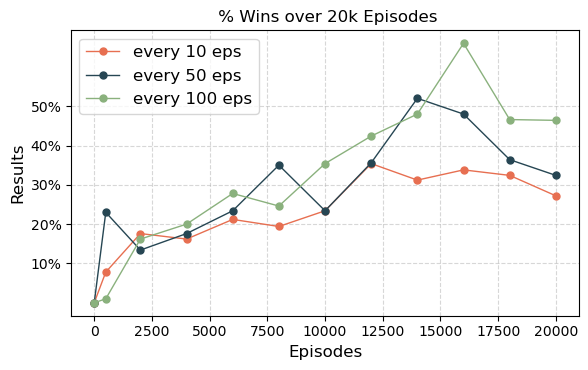

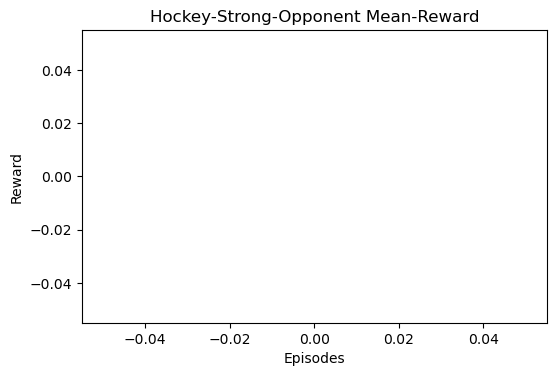

In [220]:
# Plot the rewards
file_path= f"win_loss_stats_BEST_10h.npy"
file_path2 = f"win_loss_stats_BEST_50h.npy"
file_path3 = f"win_loss_stats_BEST_100h.npy"


data1 = np.load(file_path, allow_pickle=True)
data2 = np.load(file_path2, allow_pickle=True)
data3 = np.load(file_path3, allow_pickle=True)

wins = []
losses = []
draws = []
for data in [data1, data2, data3]:
    wins_ = []
    for checkpoint in data:
        wins_.append(calculate_percentage(checkpoint[0], 500))
        #wins_.append(calculate_percentage(checkpoint[1], 500))
        #wins_.append(calculate_percentage(checkpoint[2], 500))
    wins.append(wins_)

plot_results(wins[0], wins[1], wins[2], "best_model", only_wins=False)

fig=plt.figure(figsize=(6,3.8))
#for rew in rewards:
plt.plot(running_mean(wins[0], 50), color=colors[0])
#plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Hockey-Strong-Opponent Mean-Reward")

plt.savefig(f"./results/figures/best_modelY.jpg")
plt.show()


In [221]:
## Lunar Lander Continous

[-135.0873941885936, -233.06600725081523, -230.3685741077501, -159.4662765983275, -119.82499902872263, -826.8151286017493, -123.23301896829551, -688.2886050377474, -141.280485636027, -583.4033270924377, -120.61775008549554, -675.1747675983717, -303.67468570376235, -441.03665089613327, -227.8158596148416, -742.2193213348022, -123.65397773719103, -144.82580896400728, -333.9828456965349, -817.5879594270415, -345.36673235880335, -599.0410085145996, 85.05083016635464, -598.251130022144, -125.03571855826216, -255.54744998605972, -159.9240414937865, -677.868619731952, 87.35608613417479, -143.33483896151964, -161.56433917463454, -638.9513214955799, -148.08135167392524, -459.12728599566134, -120.80506677358557, -465.71247163675537, -148.8302067880884, -670.0400494473602, -172.79119932207772, -428.4530077616405, -143.15814870050653, -134.08853815610934, 48.82725593236604, -694.4673023998714, -110.2159223341353, -582.9018491977129, -183.5470152005699, -123.04798509893067, -135.48264040610263, -18

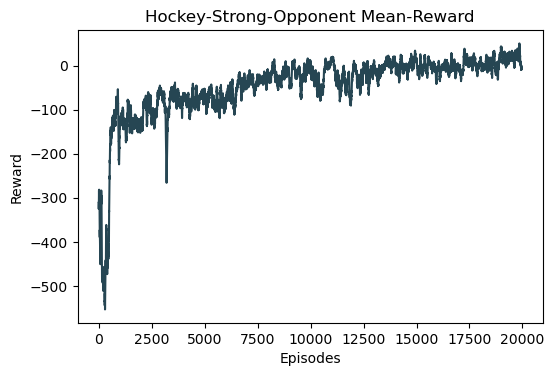

In [222]:
load_path = ["10_hard/D4PG/d4pg_Hockey-eps0.99-t32-la0.0001-lc0.0002-s20-stat.pkl"]

rewards = []

for l in range(len(load_path)):
    with open(load_path[l], 'rb') as f:
        data = pickle.load(f)
        print(data["rewards"])
        rewards_ = np.asarray(data["rewards"])
        losses_ = np.asarray(data["losses"])
        rewards.append(rewards_)

fig=plt.figure(figsize=(6,3.8))
#for rew in rewards:
plt.plot(running_mean(rewards[0], 50), color=colors[0])
#plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Hockey-Strong-Opponent Mean-Reward")

plt.savefig(f"./results/figures/hockey_mean_reward.jpg")
plt.show()

[-74.18734326947936, -317.307862330617, -102.82576807804398, -211.0453476111214, -88.83280464560312, -370.33812476126417, -50.38683711438636, -75.25203894154441, -359.3698874176041, -318.37559855383415, -100.72482993917347, -93.91701508493898, -133.7224988270249, -345.1380778182679, -341.2714586254647, -260.3266024599734, -93.07372498737223, -99.59873556430992, -134.96444281149383, -324.5201462468294, -121.13273400020147, -324.4096704594752, -351.23091368803756, -216.35642783073058, -359.1902307898491, -111.62538390066369, -444.78723637594567, -484.85781317017137, -153.4480777133582, -67.48262770411388, -109.0206567058112, -104.6529494366745, -43.128814295926134, -332.8158509595851, -150.635482124275, -300.2895928737171, -159.68571830764535, -69.59155074038013, -85.37232092139145, -434.0421154821818, -490.90870318031085, -268.68711148361285, -333.98456752634866, -399.17965151197984, -354.52844483288357, -96.85897717450797, -80.16547682206875, -72.90061590316404, -194.49529226058866, -4

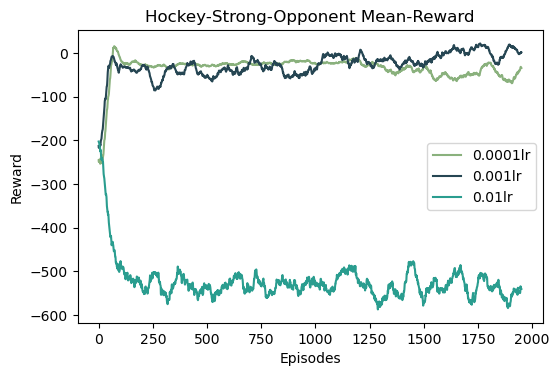

In [223]:
load_path = ["lunar_landar_0_001lr/D4PG/d4pg_LunarLanderContinuous-v2-eps0.99-t32-la0.001-lc0.001-s20-statx.pkl",
             "lunar_lander_0_01lr/D4PG/d4pg_LunarLanderContinuous-v2-eps0.99-t32-la0.01-lc0.01-s20-statx.pkl",
             "lunar_lander_no_noise/D4PG/d4pg_LunarLanderContinuous-v2-eps0.99-t32-la0.0001-lc0.0001-s20-statx.pkl"]

rewards = []

for l in range(len(load_path)):
    with open(load_path[l], 'rb') as f:
        data = pickle.load(f)
        print(data["rewards"])
        rewards_ = np.asarray(data["rewards"])
        losses_ = np.asarray(data["losses"])
        rewards.append(rewards_)

fig=plt.figure(figsize=(6,3.8))
#for rew in rewards:
plt.plot(running_mean(rewards[2][:2000], 50), color=colors[2], label="0.0001lr")
plt.plot(running_mean(rewards[0], 50), color=colors[0], label="0.001lr")
plt.plot(running_mean(rewards[1], 50), color=colors[1], label="0.01lr")

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Hockey-Strong-Opponent Mean-Reward")

plt.savefig(f"./results/figures/lunar_mean_reward.jpg")
plt.show()

In [224]:
env_name='LunarLanderContinuous-v2'
mode = 'td3'
eps = [0.1, 0.3, 0.5]
ts=32
lr=0.0001
seed=100
tau=0.005

rewards = []

for e in eps:
    r = load_rewards_and_losses(env_name, e, ts, lr, seed, tau)
    rewards.append(r)

eps = [0.005, 0.2, 0.1, 0.3, 0.5]
fig=plt.figure(figsize=(6,3.8))
for i, (e,rew) in enumerate(zip(eps, rewards)):
    color = colors[i]
    plt.plot(running_mean(rew,50),label=f"epsilon: {e}", color=color)
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Exploration noise - epsilon dependency")

plt.savefig(f"./results/figures/epsilon_dependency_LunarLander.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/D4PG_LunarLanderContinuous-v2-eps0.1-t32-l0.0001-s100-tau0.005-stat.pkl'